In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings

warnings.filterwarnings("ignore")

filename = "Pima Indians Diabetes.csv"

dataframe = read_csv(filename)

array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.50, random_state=1
)

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold, scoring="roc_auc")
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))

[0.80952381 0.74358974 0.96875    0.96666667 0.98412698 0.58333333
 0.92727273 0.85454545 0.73015873 0.71428571 0.93333333 0.69230769
 0.76363636 0.93333333 0.65454545 0.93333333 0.94871795 0.9375
 0.66       0.83333333 0.82       0.75925926 0.92592593 0.86
 0.92       0.79545455 0.92307692 0.93181818 0.85185185 0.85714286
 0.51785714 0.76785714 0.90740741 0.86111111 0.77777778 0.91071429
 0.96296296 1.         0.85714286 1.         0.65384615 1.
 0.75       1.         0.53846154 0.875      0.73214286 0.92
 0.72       0.78571429]
Accuracy: 83.510% (12.294%)


<IPython.core.display.Javascript object>

In [2]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [3]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [4]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

In [5]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, Y_train
)
print("Training performance before kfold:")
log_reg_model_train_perf

Training performance before kfold:


,Accuracy,Recall,Precision,F1
0,0.78125,0.569231,0.72549,0.637931


<IPython.core.display.Javascript object>

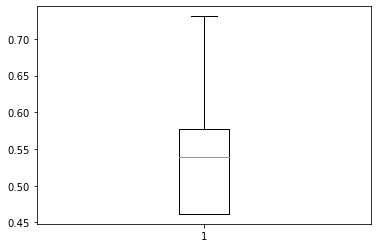

<IPython.core.display.Javascript object>

In [6]:
lr1 = LogisticRegression(random_state=1)
lr1.fit(X_train, Y_train)
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=Y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [7]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr1, X_train, Y_train
)
print("Training performance after kfold:")
log_reg_model_train_perf

Training performance after kfold:


,Accuracy,Recall,Precision,F1
0,0.78125,0.569231,0.72549,0.637931


<IPython.core.display.Javascript object>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

n_estimators = [5,10,15,20,30,50]

for val in n_estimators:
    rf_tuned1 = LogisticRegression(random_state=1)
    rf_tuned2 = LogisticRegression(random_state=1)
    rf_tuned3 = LogisticRegression(random_state=1)
    rf_tuned4 = LogisticRegression(random_state=1)
    
    recallScore = cross_val_score(rf_tuned1, X, Y, cv= kf, scoring="recall")
    precisionScore = cross_val_score(rf_tuned2, X, Y, cv= kf, scoring="precision")
    accuracyScore = cross_val_score(rf_tuned3, X, Y, cv= kf, scoring="accuracy")
    f1_macroScore = cross_val_score(rf_tuned4, X, Y, cv= kf, scoring="f1_macro")
    


    print(f'Average score({val}): recallScore : {"{:.5f}".format(recallScore.mean())},precisionScore : {"{:.5f}".format(precisionScore.mean())},accuracyScore : {"{:.5f}".format(accuracyScore.mean())},f1_macroScore : {"{:.5f}".format(f1_macroScore.mean())}')
 


Fold:1, Train set: 614, Test set:154
Fold:2, Train set: 614, Test set:154
Fold:3, Train set: 614, Test set:154
Fold:4, Train set: 615, Test set:153
Fold:5, Train set: 615, Test set:153
Average score(5): recallScore : 0.56737,precisionScore : 0.73961,accuracyScore : 0.77864,f1_macroScore : 0.74036
Average score(10): recallScore : 0.56737,precisionScore : 0.73961,accuracyScore : 0.77864,f1_macroScore : 0.74036
Average score(15): recallScore : 0.56737,precisionScore : 0.73961,accuracyScore : 0.77864,f1_macroScore : 0.74036
Average score(20): recallScore : 0.56737,precisionScore : 0.73961,accuracyScore : 0.77864,f1_macroScore : 0.74036
Average score(30): recallScore : 0.56737,precisionScore : 0.73961,accuracyScore : 0.77864,f1_macroScore : 0.74036
Average score(50): recallScore : 0.56737,precisionScore : 0.73961,accuracyScore : 0.77864,f1_macroScore : 0.74036


<IPython.core.display.Javascript object>

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

<IPython.core.display.Javascript object>

In [10]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.50, 1: 0.50}, random_state=1
)


# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 10, 2),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

kf = StratifiedKFold(n_splits=50, shuffle=True, random_state=42)

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=kf, n_jobs=-1, verbose = 10)


<IPython.core.display.Javascript object>

In [11]:
grid_obj = grid_obj.fit(X_train, Y_train)



Fitting 50 folds for each of 300 candidates, totalling 15000 fits


<IPython.core.display.Javascript object>

In [12]:
grid_obj.best_params_

{'max_depth': 8,
 'max_leaf_nodes': 15,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 10}

<IPython.core.display.Javascript object>

In [13]:
grid_obj.cv_results_["params"]

[{'max_depth': 2,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.001,
  'min_samples_leaf': 1},
 {'max_depth': 2,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.001,
  'min_samples_leaf': 2},
 {'max_depth': 2,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.001,
  'min_samples_leaf': 5},
 {'max_depth': 2,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.001,
  'min_samples_leaf': 7},
 {'max_depth': 2,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.001,
  'min_samples_leaf': 10},
 {'max_depth': 2,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.01,
  'min_samples_leaf': 1},
 {'max_depth': 2,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.01,
  'min_samples_leaf': 2},
 {'max_depth': 2,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.01,
  'min_samples_leaf': 5},
 {'max_depth': 2,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.01,
  'min_samples_leaf': 7},
 {'max_depth': 2,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.01,
  'min_samples_leaf'

<IPython.core.display.Javascript object>

In [14]:
# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_



<IPython.core.display.Javascript object>

In [15]:
# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=8,
                       max_leaf_nodes=15, min_impurity_decrease=0.001,
                       min_samples_leaf=10, random_state=1)

<IPython.core.display.Javascript object>

In [16]:
dtree_estimator_pref = model_performance_classification_sklearn(
    dtree_estimator, X_train, Y_train
)
dtree_estimator_pref

,Accuracy,Recall,Precision,F1
0,0.833333,0.692308,0.789474,0.737705


<IPython.core.display.Javascript object>

In [17]:
dtree_estimator

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=8,
                       max_leaf_nodes=15, min_impurity_decrease=0.001,
                       min_samples_leaf=10, random_state=1)

<IPython.core.display.Javascript object>

In [18]:
dtree_estimator.get_params()

{'ccp_alpha': 0.0,
 'class_weight': {0: 0.5, 1: 0.5},
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': 15,
 'min_impurity_decrease': 0.001,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

<IPython.core.display.Javascript object>

In [19]:
lr = LogisticRegression(random_state=1)


<IPython.core.display.Javascript object>

In [20]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

<IPython.core.display.Javascript object>